MEAN,MED,MODE

In [3]:
# Mean, Median and Mode without inbuilt functions
l1 = [2,4,1,5,3,3,5]
print("List: ", l1, "\n")

# MEAN
sum = 0
length = len(l1)
for i in range(length):
    sum = sum + l1[i]
    
print("Mean: ", sum/length)

#MEDIAN
x = int(length/2)
l1.sort()
if(int(length%2) == 0):
    median = ( l1[x] + l1[x-1] ) / 2
else:
    median = l1[x]

print("Median: ", median)

#MODE
maxium = 0
for n in l1:
    count = 0
    for i in range(length):
        if(l1[i] == n):
            count = count + 1
    
    if(count >= maxium):
        maxium = count
        mode = n

print("Mode: ", mode)


def getMean(numbers):
    if len(numbers) == 0:
        return None
    else:
        current_sum = 0
        for i in numbers:
            current_sum += i
            current_avg = current_sum/len(numbers)
        return current_avg

def getStandardDeviation(numbers):
    if len(numbers) == 0:
        return 0
    else:
        mean = getMean(numbers)
        std_deviation = 0
        for i in numbers:
            std_deviation += (i - mean)**2
        return (std_deviation/len(numbers))**0.5

def getNormalization(features):
    x_min = min(features)
    x_max = max(features)
    normalized_vals = []
    for i in features:
        normalized_vals.append((i - x_min)/(x_max - x_min))
    return normalized_vals

getNormalization([10,20,30,40])

def getStandardization(features):
    mean = getMean(features)
    std_deviation = getStandardDeviation(features)
    standardized_vals = []
    for i in features:
        standardized_vals.append((i - mean)/std_deviation)
    return standardized_vals
  
getStandardization([10,20,30,40])

# MinMax Normalization
def doMinMaxNormalization(numbers):
    result = []
    if len(numbers) == 0:
        return result
    else:
        min_value = min(numbers)
        max_value = max(numbers)
        for i in numbers:
            result.append((i - min_value)/(max_value - min_value))
        return result

features = [100000,-2,50,12,700,9000]
print(doMinMaxNormalization(features))

List:  [2, 4, 1, 5, 3, 3, 5] 

Mean:  3.2857142857142856
Median:  3
Mode:  5
[1.0, 0.0, 0.0005199896002079958, 0.0001399972000559989, 0.007019859602807944, 0.09001819963600728]


DECISION TREE


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df= pd.read_csv("zoo.csv")
df.head()

class_type_output = df["type"]
df = df.drop("type", axis=1)
print(df)

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df, class_type_output, test_size=0.20)
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier()
classifier.fit(x_train, y_train)
y_prediction = classifier.predict(x_test)
y_prediction

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
confusion_matrix(y_test,y_prediction)

print(classification_report(y_test, y_prediction))

print(accuracy_score(y_test, y_prediction))

predicted_class = list(y_prediction)
actual_class = list(y_test)
for i in range(len(predicted_class)):
    print("Predicted class =", predicted_class[i],"\tActual class =",actual_class[i])

     hair  feathers  eggs  milk  airborne  ...  fins  legs  tail  domestic  catsize
0       1         0     0     1         0  ...     0     4     0         0        1
1       1         0     0     1         0  ...     0     4     1         0        1
2       0         0     1     0         0  ...     1     0     1         0        0
3       1         0     0     1         0  ...     0     4     0         0        1
4       1         0     0     1         0  ...     0     4     1         0        1
..    ...       ...   ...   ...       ...  ...   ...   ...   ...       ...      ...
96      1         0     0     1         0  ...     0     2     1         0        1
97      1         0     1     0         1  ...     0     6     0         0        0
98      1         0     0     1         0  ...     0     4     1         0        1
99      0         0     1     0         0  ...     0     0     0         0        0
100     0         1     1     0         1  ...     0     2     1         0  

LINEAR REGRESSION

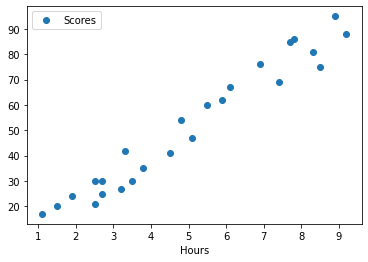

5.012 51.48
1495.9560000000001 153.0264 15346.24
2.47407679751458 24.775988375844868


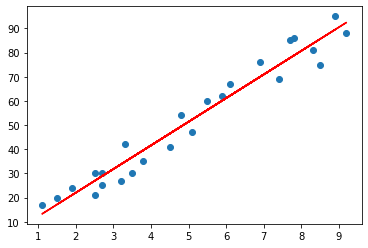

ssr: 14624.171737268869
sst:  15346.24
sse: 722.0682627311364
25


In [5]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv("student_scores.csv")
df
df.plot(x="Hours", y="Scores", style="o")
plt.show()
x_mean = df["Hours"].mean()
y_mean = df["Scores"].mean()
print(x_mean, y_mean)
df["x"] = df["Hours"] - x_mean
df["y"] = df["Scores"] - y_mean
df["x*y"] = df["x"] * df["y"]
df["x^2"] = df["x"]**2
df["y^2"] = df["y"]**2
df
summation_x_y = df["x*y"].sum()
summation_x_squared = df["x^2"].sum()
summation_y_squared = df["y^2"].sum()
print(summation_x_y, summation_x_squared, summation_y_squared)
correlation = summation_x_y / (summation_x_squared * summation_y_squared)**0.5
correlation
def getMean(numbers):
    if len(numbers) == 0:
        return None
    else:
        current_sum = 0
        for i in numbers:
            current_sum += i
            current_avg = current_sum/len(numbers)
        return current_avg

def getStandardDeviation(numbers):
    if len(numbers) == 0:
        return 0
    else:
        mean = getMean(numbers)
        std_deviation = 0
        for i in numbers:
            std_deviation += (i - mean)**2
        return (std_deviation/len(numbers))**0.5
std_deviation_x = getStandardDeviation(df["x"].tolist())
std_deviation_y = getStandardDeviation(df["y"].tolist())
print(std_deviation_x, std_deviation_y)
m = correlation * (std_deviation_y / std_deviation_x)
m
c = df["Scores"].mean() - m * df["Hours"].mean()
c
df["y_prediction"] = m * df["Hours"] + c
df
plot1 = plt.scatter(df["Hours"], df["Scores"])
plot2 = plt.plot(df["Hours"], df["y_prediction"],color="r")
plt.show()
df["y_prediction"].mean()
def getSSR(df_pred):
    result = 0
    for i in range(len(df_pred)):
        result += (df_pred[i] - df_pred.mean())**2
    return result
print("ssr:",getSSR(df["y_prediction"]))
def getSST(df_actual):
    result = 0
    for i in range(len(df_actual)):
        result += (df_actual[i] - df_actual.mean())**2
    return result
print("sst: ",getSST(df["Scores"]))
def getSSE(df_actual, df_pred):
    result = 0
    for i in range(len(df_actual)):
        result += (df_actual[i] - df_pred[i])**2
    return result
print("sse:" ,getSSE(df["Scores"], df["y_prediction"]))
r2 = getSSR(df["y_prediction"])/getSST(df["Scores"])
r2
print(df["Scores"].count())
cost=getSSE

LOGISTIC REGRESSION

In [7]:
import pandas as pd
data = pd.read_csv("student.csv")
data.head(10)
data.describe()
# Splitting data

# Input data
x = data.iloc[:, [0,1] ].values

# Output data
y = data.iloc[:, 2].values

print(x[:5, :]) # Prinitng the first 5 rows of split input data
print()
print(y[:5])   # Printing the first 5 rows of split output data

#Data Preprocessing

from sklearn import preprocessing

# Normalising data
norX = preprocessing.scale(x)

# Printing first 5 rows of Normalised data
print(norX[:5, :])
# Training and Testing

import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold

foldings = KFold(n_splits = 5)

# for train_index, test_index in foldings.split(norX):
xtrain, xtest, ytrain, ytest = train_test_split(norX, y, train_size=0.80, test_size=0.20)
# xtrain, xtest = norX[train_index], norX[test_index]
# ytrain, ytest = y[train_index], y[test_index]

x1 = xtrain[:, 0]
x2 = xtrain[:, 1]

b0 = 0
b1 = 0
b2 = 0
epoch = 1000
alpha = 0.001

while(epoch>0):
    for i in range(len(xtrain)):
        pred = b0 + b1*x1[i] + b2*x2[i]
        prediction = 1/(1 + np.exp(-pred))
        b0 = b0 + alpha*(ytrain[i]-prediction)*prediction*(1-prediction)*1.0
        b1 = b1 + alpha*(ytrain[i]-prediction)*prediction*(1-prediction)*x1[i]
        b2 = b2 + alpha*(ytrain[i]-prediction)*prediction*(1-prediction)*x2[i]
    epoch = epoch - 1

print(b0)
print(b1)
print(b2)
# Prediction

x3 = xtest[:, 0]
x4 = xtest[:, 1]
print(ytest)

pred_list = []
y_pred = [0]*len(xtest)

for i in range(len(xtest)):
    predo = b0 + b1*x3[i] + b2*x4[i]
    y_pred[i] = np.round(1/(1 + np.exp(-predo)))
    pred_list.append(int(y_pred[i]))

print(pred_list)
# Accuracy Score
from sklearn.metrics import accuracy_score
res = accuracy_score(ytest, y_pred)
acc = res*100
print("Accuracy in precentage:", acc, "%")

[[34.62365962 78.02469282]
 [30.28671077 43.89499752]
 [35.84740877 72.90219803]
 [60.18259939 86.3085521 ]
 [79.03273605 75.34437644]]

[0 0 0 1 1]
[[-1.60224763  0.63834112]
 [-1.82625564 -1.2075414 ]
 [-1.53903969  0.3612943 ]
 [-0.28210129  1.0863683 ]
 [ 0.69152826  0.49337794]]
0.5112930429121998
1.533129541963031
1.3092102360860882
[0 1 1 1 1 0 1 1 1 0 1 1 0 1 1 0 1 0 1 1]
[0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1]
Accuracy in precentage: 85.0 %


KMEANS

In [8]:
import math
def kmeans_3clusters(cl1,cl2,cl3,data):
    cluster1=[]
    cluster2=[]
    cluster3=[]
    def euc(a,b,cl1,cl2,cl3):
        d1=math.sqrt((cl1[0]-a)**2 + (cl1[1]-b)**2)
        d2=math.sqrt((cl2[0]-a)**2 + (cl2[1]-b)**2)
        d3=math.sqrt((cl3[0]-a)**2 + (cl3[1]-b)**2)
        md=min(d1,d2,d3)
        if(md==d1):
            cluster1.append([a,b])
        elif(md==d2):
            cluster2.append([a,b])
        else:
            cluster3.append([a,b])

    for j in range(15):
        for i in range(0,10):
            euc(data['X1'][i],data['X2'][i],cl1,cl2,cl3)
        print("cluster1 : ",cluster1)
        print("cluster2 : ",cluster2)
        print("cluster3 : ",cluster3)
        cl1=np.mean(cluster1, axis=0)
        cl2=np.mean(cluster2, axis=0)
        cl3=np.mean(cluster3, axis=0)
        print("centroid1 : ",np.mean(cluster1, axis=0))
        print("centroid2 : ",np.mean(cluster2, axis=0))
        print("centroid3 : ",np.mean(cluster3, axis=0))
        cluster1=[]
        cluster2=[]
        cluster3=[]
        print("----------------","ITERATION",j+1,"--------------------")

In [9]:
import pandas as pd
import numpy as np
data=pd.read_csv("samp.csv")
data
import math 
kmeans_3clusters([6.2,3.2],[6.6,3.7],[6.5,3.0],data)

cluster1 :  [[5.9, 3.2], [4.6, 2.9], [4.7, 3.2], [5.0, 3.0], [4.9, 3.1], [5.1, 3.8], [6.0, 3.0]]
cluster2 :  [[5.5, 4.2]]
cluster3 :  [[6.2, 2.8], [6.7, 3.1]]
centroid1 :  [5.17142857 3.17142857]
centroid2 :  [5.5 4.2]
centroid3 :  [6.45 2.95]
---------------- ITERATION 1 --------------------
cluster1 :  [[4.6, 2.9], [4.7, 3.2], [5.0, 3.0], [4.9, 3.1]]
cluster2 :  [[5.5, 4.2], [5.1, 3.8]]
cluster3 :  [[5.9, 3.2], [6.2, 2.8], [6.7, 3.1], [6.0, 3.0]]
centroid1 :  [4.8  3.05]
centroid2 :  [5.3 4. ]
centroid3 :  [6.2   3.025]
---------------- ITERATION 2 --------------------
cluster1 :  [[4.6, 2.9], [4.7, 3.2], [5.0, 3.0], [4.9, 3.1]]
cluster2 :  [[5.5, 4.2], [5.1, 3.8]]
cluster3 :  [[5.9, 3.2], [6.2, 2.8], [6.7, 3.1], [6.0, 3.0]]
centroid1 :  [4.8  3.05]
centroid2 :  [5.3 4. ]
centroid3 :  [6.2   3.025]
---------------- ITERATION 3 --------------------
cluster1 :  [[4.6, 2.9], [4.7, 3.2], [5.0, 3.0], [4.9, 3.1]]
cluster2 :  [[5.5, 4.2], [5.1, 3.8]]
cluster3 :  [[5.9, 3.2], [6.2, 2.8], [6.

RANDOM FOREST

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
data = pd.read_csv('pima.csv')
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import pandas_profiling
from matplotlib import rcParams

import warnings
warnings.filterwarnings("ignore")
rcParams["figure.figsize"]=10,6
np.random.seed(42)
data.sample(5)

X=data.drop("Outcome",axis=1)
y=data["Outcome"]

scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)

X_train,X_test,Y_train,Y_test=train_test_split(X_scaled,y,stratify=y,test_size=0.10,random_state=42)

classifier = RandomForestClassifier(n_estimators=100)
classifier.fit(X_train,Y_train)



y_pred = classifier.predict(X_test)

print("Accuracy:",accuracy_score(Y_test,y_pred))
Accuracy: 0.8051948051948052

feature_importances_df = pd.DataFrame(
    {"feature":list(X.columns),"importance":classifier.feature_importances_}
).sort_values("importance",ascending=False)

feature_importances_df

from sklearn.tree import DecisionTreeClassifier
clf=DecisionTreeClassifier()
clf.fit(X_train,Y_train)

Y_pred = clf.predict(X_test)
from sklearn.metrics import accuracy_score
print("Accuracy-DecisionTree :",accuracy_score(Y_test,Y_pred))




Accuracy: 0.8051948051948052
Accuracy-DecisionTree : 0.7532467532467533


SVM

In [13]:
from sklearn.svm import SVC
from sklearn import svm
import numpy as np

X=np.array([[3,4],[1,4],[2,3],[6,-1],[7,-1],[5,-3]])
y=np.array([-1,-1,-1,1,1,1])

l=SVC(C=1e5,kernel='linear')
l.fit(X,y)

print('w = ',l.coef_)
print('b = ',l.intercept_)
print('Indices of support vectors= ',l.support_)
print('Support vectors= ')
print(l.support_vectors_)
print('No. of support vectors fro each class= ',l.n_support_)
print('coefficient of support vectors in decision function= ',np.abs(l.dual_coef_))

import pandas as pd
data=pd.read_csv('glass.csv')
data.head()

x=data.drop('Type',axis=1)
y=data.Type

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

linear=svm.SVC(kernel='linear')
linear.fit(x_train,y_train)

SVC(kernel='linear')

print(linear.support_vectors_)

print(linear.n_support_)
y_pred=linear.predict(x_test)
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,y_pred))
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,y_pred))
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

model1=SVC(kernel='sigmoid')
model2=SVC(kernel='poly')
model3=SVC(kernel='rbf')
model1.fit(x_train,y_train)
model2.fit(x_train,y_train)
model3.fit(x_train,y_train)

y_pred1=model1.predict(x_test)

y_pred2=model2.predict(x_test)

y_pred3=model3.predict(x_test)

print(accuracy_score(y_test,y_pred1))

print(accuracy_score(y_test,y_pred2))

print(accuracy_score(y_test,y_pred3))







w =  [[ 0.25 -0.25]]
b =  [-0.75]
Indices of support vectors=  [2 3]
Support vectors= 
[[ 2.  3.]
 [ 6. -1.]]
No. of support vectors fro each class=  [1 1]
coefficient of support vectors in decision function=  [[0.0625 0.0625]]
[[7.00000e+01 1.52300e+00 1.33100e+01 3.58000e+00 8.20000e-01 7.19900e+01
  1.20000e-01 1.01700e+01 0.00000e+00 3.00000e-02]
 [7.30000e+01 1.51593e+00 1.30900e+01 3.59000e+00 1.52000e+00 7.31000e+01
  6.70000e-01 7.83000e+00 0.00000e+00 0.00000e+00]
 [1.46000e+02 1.51839e+00 1.28500e+01 3.67000e+00 1.24000e+00 7.25700e+01
  6.20000e-01 8.68000e+00 0.00000e+00 3.50000e-01]
 [1.47000e+02 1.51769e+00 1.36500e+01 3.66000e+00 1.11000e+00 7.27700e+01
  1.10000e-01 8.60000e+00 0.00000e+00 0.00000e+00]
 [1.62000e+02 1.51934e+00 1.36400e+01 3.54000e+00 7.50000e-01 7.26500e+01
  1.60000e-01 8.89000e+00 1.50000e-01 2.40000e-01]
 [1.64000e+02 1.51514e+00 1.40100e+01 2.68000e+00 3.50000e+00 6.98900e+01
  1.68000e+00 5.87000e+00 2.20000e+00 0.00000e+00]
 [1.66000e+02 1.52171e

NAIVE BAYES

In [14]:
import pandas as pd
import numpy as np

data = pd.read_csv('covid.csv')

data

from sklearn import preprocessing
le = preprocessing.LabelEncoder()
pc_encoded=le.fit_transform(data['pc'].values)
wbc_encoded=le.fit_transform(data['wbc'].values)
mc_encoded=le.fit_transform(data['mc'].values)
ast_encoded=le.fit_transform(data['ast'].values)
bc_encoded=le.fit_transform(data['bc'].values)
ldh_encoded=le.fit_transform(data['ldh'].values)
Y=le.fit_transform(data['diagnosis'].values)

X=np.array(list(zip(pc_encoded,wbc_encoded,mc_encoded,ast_encoded,bc_encoded,ldh_encoded)))
X
Y
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
model = MultinomialNB()

from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y)

model.fit(X_train, Y_train)
y_pred = model.predict(X_test)

print("Accuracy:",accuracy_score(Y_test, y_pred))

print("\nReport")
print(classification_report(Y_test,y_pred))


Accuracy: 0.5714285714285714

Report
              precision    recall  f1-score   support

           0       0.33      0.50      0.40         2
           1       0.75      0.60      0.67         5

    accuracy                           0.57         7
   macro avg       0.54      0.55      0.53         7
weighted avg       0.63      0.57      0.59         7



PCA

   sepal length  sepal width  petal length  petal width
0           5.1          3.5           1.4          0.2
1           4.9          3.0           1.4          0.2
2           4.7          3.2           1.3          0.2
3           4.6          3.1           1.5          0.2
4           5.0          3.6           1.4          0.2 

0    1
1    1
2    1
3    1
4    1
Name: species, dtype: int64
[2.93808505 0.9201649  0.14774182 0.02085386] 

[[ 0.52106591 -0.37741762 -0.71956635  0.26128628]
 [-0.26934744 -0.92329566  0.24438178 -0.12350962]
 [ 0.5804131  -0.02449161  0.14212637 -0.80144925]
 [ 0.56485654 -0.06694199  0.63427274  0.52359713]]
Variance of each feature [72.9624454132999, 22.850761786701725, 3.6689218892828612, 0.5178709107154993]


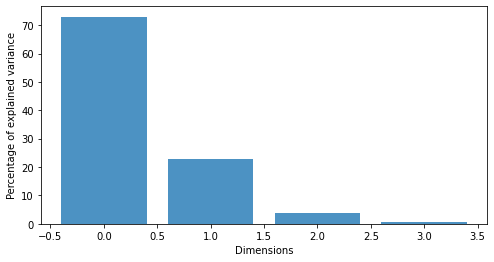

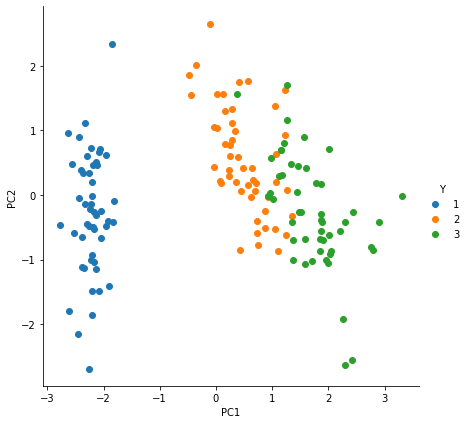

In [15]:
import pandas as pd

data = pd.read_csv("iris.csv")
data.head(5)
y = data["species"]

# Input data
X = data.drop("species", 1)

print(X[:5], "\n")
print(y[:5])
from sklearn.preprocessing import StandardScaler

x_scaled = StandardScaler().fit_transform(X)
x_scaled[:4]
import numpy as np
# Covariance Matrix
features = x_scaled.T
covMatrix = np.cov(features)
covMatrix
# Eigen values and Eigen vector
values, vectors = np.linalg.eig(covMatrix)
print(values, "\n")
print(vectors)

# Variance of each feature w.r.t eigen vlaues
explained_variance = []
for i in range(len(values)):
  res = values[i]/np.sum(values)*100
  explained_variance.append(res)

print("Variance of each feature", explained_variance)

import matplotlib.pyplot as plt
import seaborn as sns

# Bar graph
plt.figure(figsize=(8,4))
plt.bar(range(4), explained_variance, alpha=0.8)
plt.ylabel("Percentage of explained variance")
plt.xlabel("Dimensions")

plt.show()

pro_1 = x_scaled.dot(vectors.T[0])
pro_2 = x_scaled.dot(vectors.T[1])

result = pd.DataFrame(pro_1, columns=["PC1"])
result["PC2"] = pro_2
result["Y"] = y

result.head(10)
sns.FacetGrid(result, hue="Y", height=6).map(plt.scatter, 'PC1', 'PC2').add_legend()
plt.show()
